In [ ]:
pip install pytorch-lightning pytorch-forecasting

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.1/46.1 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 812.3/812.3 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.4/140.4 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 808.5/808.5 kB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.8/155.8 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 866.2/866.2 kB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.0 MB/s eta 0:00:00


In [ ]:
from google.colab import files

import pandas as pd

data = pd.read_csv('merged_data.csv')

data

,Date,fear_index,bit price,Open,High,Low,BNB price,eth price
0,2018-02-01,30,9181.1,10266.2,10303.0,8789.2,9.51,1033.55
1,2018-02-02,15,8893.2,9179.8,9201.4,7915.8,9.75,920.85
2,2018-02-03,40,9241.1,8894.4,9506.9,8249.3,9.75,971.49
3,2018-02-04,24,8222.2,9241.5,9382.1,7932.1,8.40,829.43
4,2018-02-05,11,6938.5,8220.8,8383.2,6651.9,6.70,696.86
...,...,...,...,...,...,...,...,...
2337,2024-06-26,46,60849.4,61809.9,62469.4,60715.1,573.08,3370.72
2338,2024-06-27,40,61685.3,60848.3,62351.2,60629.4,581.70,3450.45
2339,2024-06-28,47,60403.3,61684.6,62175.4,60081.9,567.31,3380.15
2340,2024-06-29,30,60973.4,60403.7,61192.8,60382.8,570.39,3378.60


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

data = pd.read_csv('merged_data.csv')

data['Date'] = pd.to_datetime(data['Date'])

data.set_index('Date', inplace=True)

features = data[['fear_index', 'Open', 'High', 'Low', 'bit price']]
target = data['bit price']


# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42, shuffle=False)

# Data normalisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data to (samples, timesteps, features)
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LSTM, LayerNormalization, Dropout, Concatenate
from tensorflow.keras.models import Model

def build_tft_model(input_shape):
    inputs = Input(shape=input_shape)

    # LSTM layers
    lstm_out = LSTM(128, return_sequences=True)(inputs)
    lstm_out = LSTM(128)(lstm_out)

    # Fully connected layers
    dense_out = Dense(64, activation='relu')(lstm_out)
    dense_out = Dropout(0.3)(dense_out)
    dense_out = Dense(32, activation='relu')(dense_out)
    dense_out = Dropout(0.3)(dense_out)

    # Output layer
    outputs = Dense(1)(dense_out)

    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='mse')
    return model

# Constructing the TFT model
input_shape = (1, X_train_scaled.shape[1])  # 调整为 (timesteps, features)
model = build_tft_model(input_shape)

# Print Model Architecture
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 1, 5)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 1, 128)              │          68,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 210,561 (822.50 KB)

 Trainable params: 210,561 (822.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 735062464.0000 - val_loss: 671778944.0000
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 670453440.0000 - val_loss: 663844672.0000
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 678586304.0000 - val_loss: 638154240.0000
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 668472064.0000 - val_loss: 582090944.0000
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 584096832.0000 - val_loss: 433829568.0000
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 455354816.0000 - val_loss: 300339456.0000
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 403590304.0000 - val_loss: 187773536.0000
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 305762464.0000 - val_loss: 93368496.0000
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 222960544.0000 - val_loss: 52143080.0000
Epoch 10/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 141947008.0000 - val_loss: 62336456.0000

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
R²=0.9508, MAE=2091.6937, RMSE=3544.7334, MAPE=3.7801%, CVRMSE=8.4562%


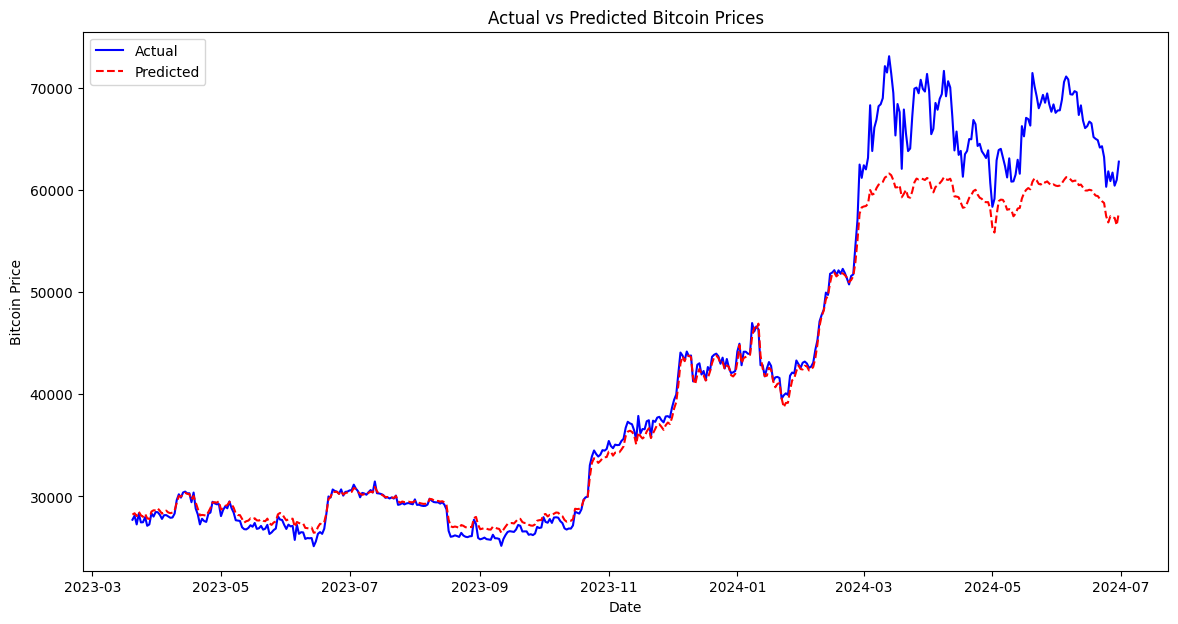

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import matplotlib.pyplot as plt

y_pred = model.predict(X_test_reshaped)
y_pred = y_pred.flatten()  # Flatten the predictions into a one-dimensional array

# Calculation of evaluation indicators
def calculate_metrics(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    cvrmse = rmse / np.mean(y_true) * 100
    return r2, mae, rmse, mape, cvrmse

metrics = calculate_metrics(y_test, y_pred)

print(f'R²={metrics[0]:.4f}, MAE={metrics[1]:.4f}, RMSE={metrics[2]:.4f}, MAPE={metrics[3]:.4f}%, CVRMSE={metrics[4]:.4f}%')

# Plotting actual versus predicted values
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted', color='red', linestyle='--')
plt.title('Actual vs Predicted Bitcoin Prices')
plt.xlabel('Date')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.show()

ALL

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('merged_data.csv')

data['Date'] = pd.to_datetime(data['Date'])

data.set_index('Date', inplace=True)

features = data[['fear_index','bit price', 'Open', 'High', 'Low', 'BNB price', 'eth price']]
target = data['bit price']


# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42, shuffle=False)

# Data normalisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data to (samples, timesteps, features)
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LSTM, LayerNormalization, Dropout, Concatenate
from tensorflow.keras.models import Model

def build_tft_model(input_shape):
    inputs = Input(shape=input_shape)

    # LSTM layers
    lstm_out = LSTM(128, return_sequences=True)(inputs)
    lstm_out = LSTM(128)(lstm_out)

    # Fully connected layers
    dense_out = Dense(64, activation='relu')(lstm_out)
    dense_out = Dropout(0.3)(dense_out)
    dense_out = Dense(32, activation='relu')(dense_out)
    dense_out = Dropout(0.3)(dense_out)

    # Output layer
    outputs = Dense(1)(dense_out)

    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='mse')
    return model

# Constructing the TFT model
input_shape = (1, X_train_scaled.shape[1])  # 调整为 (timesteps, features)
model = build_tft_model(input_shape)

# Print Model Architecture
model.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 1, 7)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 1, 128)              │          69,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 211,585 (826.50 KB)

 Trainable params: 211,585 (826.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 训练模型
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 727908224.0000 - val_loss: 671425728.0000
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 716958208.0000 - val_loss: 661197760.0000
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 718915136.0000 - val_loss: 633876928.0000
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 643078784.0000 - val_loss: 583337152.0000
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 608450816.0000 - val_loss: 437808480.0000
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 562033728.0000 - val_loss: 301581536.0000
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 428294784.0000 - val_loss: 190354352.0000
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 306915488.0000 - val_loss: 95012800.0000
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 210007248.0000 - val_loss: 54055704.0000
Epoch 10/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 145094768.0000 - val_loss: 75595176.

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
R²=0.9510, MAE=2354.4193, RMSE=3539.3857, MAPE=4.7134%, CVRMSE=8.4435%


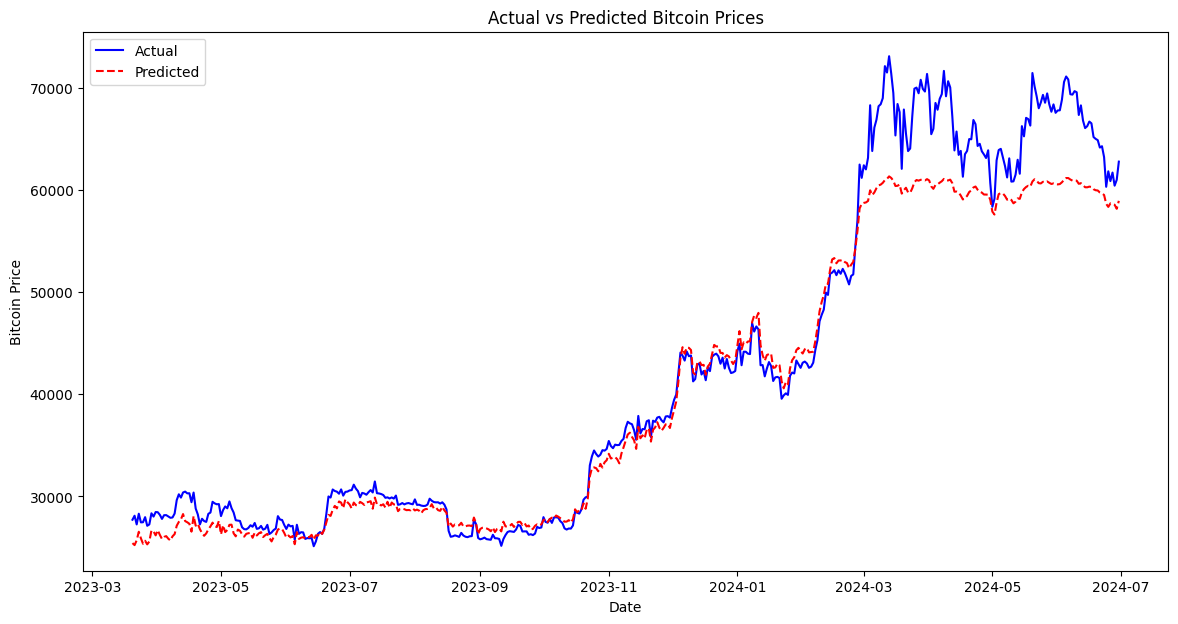

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test_reshaped)
y_pred = y_pred.flatten()  # Flatten the predictions into a one-dimensional array

# Calculation of evaluation indicators
def calculate_metrics(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    cvrmse = rmse / np.mean(y_true) * 100
    return r2, mae, rmse, mape, cvrmse

metrics = calculate_metrics(y_test, y_pred)

print(f'R²={metrics[0]:.4f}, MAE={metrics[1]:.4f}, RMSE={metrics[2]:.4f}, MAPE={metrics[3]:.4f}%, CVRMSE={metrics[4]:.4f}%')

# Plotting actual versus predicted values
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted', color='red', linestyle='--')
plt.title('Actual vs Predicted Bitcoin Prices')
plt.xlabel('Date')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.show()

Hyperparameters

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

data = pd.read_csv('merged_data.csv')

data['Date'] = pd.to_datetime(data['Date'])

data.set_index('Date', inplace=True)

features = data[['fear_index','bit price', 'Open', 'High', 'Low', 'BNB price', 'eth price']]
target = data['bit price']


# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42, shuffle=False)

# Data normalisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data to (samples, timesteps, features)
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LayerNormalization, Dropout, MultiHeadAttention, Conv1D, Add
from tensorflow.keras.models import Model

def build_informer_model(num_heads=4, d_model=128, d_ff=512, dropout_rate=0.1):
    input_shape = (1, X_train_scaled.shape[1])
    inputs = Input(shape=input_shape)

    # Adjustment of the input shape through the Dense layer
    dense_in = Dense(d_model)(inputs)

    # Multi-Head Attention
    attention_out = MultiHeadAttention(num_heads=num_heads, key_dim=d_model)(dense_in, dense_in)
    attention_out = Dropout(dropout_rate)(attention_out)
    attention_out = LayerNormalization()(Add()([dense_in, attention_out]))

    # Feed-Forward Network
    ff_out = Conv1D(filters=d_ff, kernel_size=1, activation='relu')(attention_out)
    ff_out = Dropout(dropout_rate)(ff_out)
    ff_out = Conv1D(filters=d_model, kernel_size=1)(ff_out)
    ff_out = LayerNormalization()(Add()([attention_out, ff_out]))

    # Flatten and Dense layers
    flatten_out = tf.keras.layers.Flatten()(ff_out)
    dense_out = Dense(64, activation='relu')(flatten_out)
    dense_out = Dropout(dropout_rate)(dense_out)
    dense_out = Dense(32, activation='relu')(dense_out)
    dense_out = Dropout(dropout_rate)(dense_out)

    # Output layer
    outputs = Dense(1)(dense_out)

    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='mse')
    return model


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import KFold
# Define custom scoring functions
def custom_scorer(y_true, y_pred):
    return -mean_squared_error(y_true, y_pred)

# Packaging custom scoring functions
scorer = make_scorer(custom_scorer, greater_is_better=False)

# Defining the hyperparametric search space
param_distributions = {
    'num_heads': [2, 4, 6, 8],
    'd_model': [64, 128, 256],
    'd_ff': [256, 512, 1024],
    'dropout_rate': [0.1, 0.2, 0.3, 0.4],
    'batch_size': [16, 32, 64],
    'epochs': [50, 100]
}

def create_model(num_heads, d_model, d_ff, dropout_rate):
    model = build_informer_model(num_heads=num_heads, d_model=d_model, d_ff=d_ff, dropout_rate=dropout_rate)
    return model

def fit_model(X, y, **kwargs):
    model = create_model(kwargs['num_heads'], kwargs['d_model'], kwargs['d_ff'], kwargs['dropout_rate'])
    history = model.fit(X, y, epochs=kwargs['epochs'], batch_size=kwargs['batch_size'], validation_split=0.2, verbose=0)
    return model

# Custom Hyperparameter Search Classes
class CustomRandomSearchCV:
    def __init__(self, param_distributions, n_iter=10, cv=3, random_state=42, n_jobs=-1):
        self.param_distributions = param_distributions
        self.n_iter = n_iter
        self.cv = cv
        self.random_state = random_state
        self.n_jobs = n_jobs
        self.best_params_ = None
        self.best_score_ = None
        self.best_model_ = None

    def fit(self, X, y):
        best_score = float('inf')
        for i in range(self.n_iter):
            params = {key: np.random.choice(value) for key, value in self.param_distributions.items()}
            model = fit_model(X, y, **params)
            scores = []
            for train_idx, val_idx in KFold(n_splits=self.cv, shuffle=True, random_state=self.random_state).split(X):
                X_train, X_val = X[train_idx], X[val_idx]
                y_train, y_val = y[train_idx], y[val_idx]
                model.fit(X_train, y_train, epochs=params['epochs'], batch_size=params['batch_size'], verbose=0)
                y_pred = model.predict(X_val).flatten()
                score = mean_squared_error(y_val, y_pred)
                scores.append(score)
            avg_score = np.mean(scores)
            if avg_score < best_score:
                best_score = avg_score
                self.best_params_ = params
                self.best_score_ = best_score
                self.best_model_ = model

# Instantiate and search
random_search = CustomRandomSearchCV(param_distributions, n_iter=10, cv=3, random_state=42, n_jobs=-1)
random_search.fit(X_train_reshaped, y_train)

# Printing optimal hyperparameter combinations
print(f"Best Parameters: {random_search.best_params_}")



/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 2, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
<ipython-input-12-4a6288b0af82>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_val = y[train_idx], y[val_idx]


 1/20 ━━━━━━━━━━━━━━━━━━━━ 3s 197ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (32, 2, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 2, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
<ipython-input-12-4a6288b0af82>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_val = y[train_idx], y[val_idx]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


<ipython-input-12-4a6288b0af82>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_val = y[train_idx], y[val_idx]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 8, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
<ipython-input-12-4a6288b0af82>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_val = y[train_idx], y[val_idx]


19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  

/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (32, 8, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 8, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
<ipython-input-12-4a6288b0af82>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_val = y[train_idx], y[val_idx]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


<ipython-input-12-4a6288b0af82>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_val = y[train_idx], y[val_idx]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 2, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
<ipython-input-12-4a6288b0af82>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_val = y[train_idx], y[val_idx]


12/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  

/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (32, 2, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 2, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
<ipython-input-12-4a6288b0af82>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_val = y[train_idx], y[val_idx]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


<ipython-input-12-4a6288b0af82>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_val = y[train_idx], y[val_idx]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
<ipython-input-12-4a6288b0af82>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_val = y[train_idx], y[val_idx]


 1/20 ━━━━━━━━━━━━━━━━━━━━ 4s 211ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (32, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
<ipython-input-12-4a6288b0af82>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_val = y[train_idx], y[val_idx]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


<ipython-input-12-4a6288b0af82>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_val = y[train_idx], y[val_idx]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 8, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
<ipython-input-12-4a6288b0af82>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_val = y[train_idx], y[val_idx]


19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  

/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (32, 8, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 8, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
<ipython-input-12-4a6288b0af82>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_val = y[train_idx], y[val_idx]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


<ipython-input-12-4a6288b0af82>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_val = y[train_idx], y[val_idx]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 2, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
<ipython-input-12-4a6288b0af82>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_val = y[train_idx], y[val_idx]


 1/20 ━━━━━━━━━━━━━━━━━━━━ 3s 188ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (32, 2, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 2, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
<ipython-input-12-4a6288b0af82>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_val = y[train_idx], y[val_idx]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


<ipython-input-12-4a6288b0af82>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_val = y[train_idx], y[val_idx]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 6, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
<ipython-input-12-4a6288b0af82>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_val = y[train_idx], y[val_idx]


 1/20 ━━━━━━━━━━━━━━━━━━━━ 3s 192ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (32, 6, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 6, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
<ipython-input-12-4a6288b0af82>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_val = y[train_idx], y[val_idx]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


<ipython-input-12-4a6288b0af82>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_val = y[train_idx], y[val_idx]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 2, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
<ipython-input-12-4a6288b0af82>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_val = y[train_idx], y[val_idx]


13/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  

/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (32, 2, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 2, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
<ipython-input-12-4a6288b0af82>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_val = y[train_idx], y[val_idx]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


<ipython-input-12-4a6288b0af82>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_val = y[train_idx], y[val_idx]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 6, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
<ipython-input-12-4a6288b0af82>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_val = y[train_idx], y[val_idx]


 1/20 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step

/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (32, 6, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 6, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
<ipython-input-12-4a6288b0af82>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_val = y[train_idx], y[val_idx]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


<ipython-input-12-4a6288b0af82>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_val = y[train_idx], y[val_idx]


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
<ipython-input-12-4a6288b0af82>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_val = y[train_idx], y[val_idx]
/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (32, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


16/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


<ipython-input-12-4a6288b0af82>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_val = y[train_idx], y[val_idx]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


<ipython-input-12-4a6288b0af82>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_val = y[train_idx], y[val_idx]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Best Parameters: {'num_heads': 2, 'd_model': 256, 'd_ff': 512, 'dropout_rate': 0.1, 'batch_size': 16, 'epochs': 100}


In [ ]:
# Getting the optimal hyperparameters
best_params = random_search.best_params_

# Constructing and training models using optimal hyperparameters
best_model = build_informer_model(
    num_heads=best_params['num_heads'],
    d_model=best_params['d_model'],
    d_ff=best_params['d_ff'],
    dropout_rate=best_params['dropout_rate']
)

history = best_model.fit(X_train_reshaped, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'], validation_split=0.2)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 2, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - loss: 720331904.0000 - val_loss: 613847808.0000
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 589953408.0000 - val_loss: 268268640.0000
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 289264320.0000 - val_loss: 126337016.0000
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 38241644.0000 - val_loss: 541079872.0000
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 26421486.0000 - val_loss: 590966272.0000
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 31347988.0000 - val_loss: 524791136.0000
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 27488324.0000 - val_loss: 364363616.0000
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 25139322.0000 - val_loss: 271174752.0000
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 17454576.0000 - val_loss: 263438800.0000
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 16338347.0000 - val_loss: 193901584.000

 1/15 ━━━━━━━━━━━━━━━━━━━━ 3s 225ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (32, 2, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
R²=0.8999, MAE=4012.1607, RMSE=5056.2878, MAPE=11.0430%, CVRMSE=12.0621%


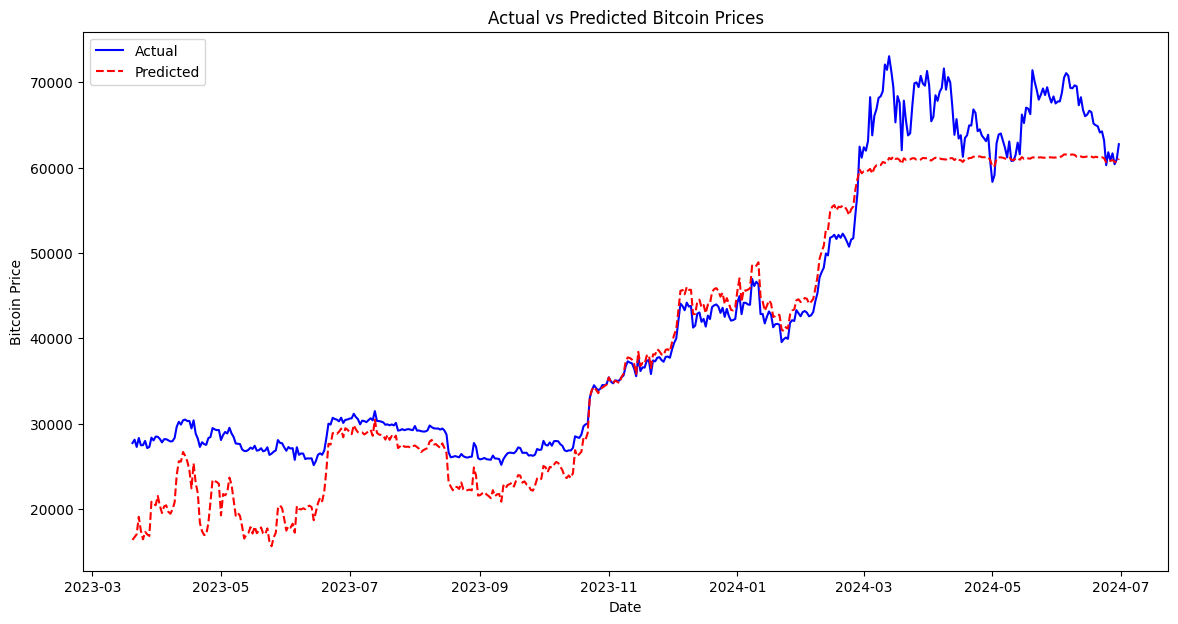

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

y_pred = best_model.predict(X_test_reshaped)
y_pred = y_pred.flatten()  # Flatten the predictions into a one-dimensional array

# Calculation of evaluation indicators
def calculate_metrics(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    cvrmse = rmse / np.mean(y_true) * 100
    return r2, mae, rmse, mape, cvrmse

metrics = calculate_metrics(y_test, y_pred)

print(f'R²={metrics[0]:.4f}, MAE={metrics[1]:.4f}, RMSE={metrics[2]:.4f}, MAPE={metrics[3]:.4f}%, CVRMSE={metrics[4]:.4f}%')

# Plotting actual versus predicted values
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted', color='red', linestyle='--')
plt.title('Actual vs Predicted Bitcoin Prices')
plt.xlabel('Date')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.show()


informer

In [ ]:
!git clone https://github.com/zhouhaoyi/Informer2020.git
!git clone https://github.com/zhouhaoyi/ETDataset.git
!ls

Cloning into 'Informer2020'...
remote: Enumerating objects: 576, done.
remote: Counting objects: 100% (222/222), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 576 (delta 199), reused 188 (delta 188), pack-reused 354
Receiving objects: 100% (576/576), 6.48 MiB | 9.68 MiB/s, done.
Resolving deltas: 100% (336/336), done.
Cloning into 'ETDataset'...
remote: Enumerating objects: 187, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 187 (delta 25), reused 20 (delta 20), pack-reused 159
Receiving objects: 100% (187/187), 3.86 MiB | 7.59 MiB/s, done.
Resolving deltas: 100% (62/62), done.
ETDataset  Informer2020  merged_data.csv  sample_data


In [ ]:
import sys
if not 'Informer2020' in sys.path:
    sys.path += ['Informer2020']

In [ ]:
pip install informer


In [ ]:
import numpy as np
import pandas as pd
import torch
import pytorch_lightning as pl
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from pytorch_forecasting import TimeSeriesDataSet, TemporalFusionTransformer
from pytorch_forecasting.data.encoders import GroupNormalizer
from pytorch_forecasting.metrics import QuantileLoss

# Load the dataset
data = pd.read_csv('merged_data.csv')

# Data preparation
data['Date'] = pd.to_datetime(data['Date'])
data['time_idx'] = (data['Date'] - data['Date'].min()).dt.days

# Prepare the TimeSeriesDataSet
max_encoder_length = 60  # length of history
max_prediction_length = 1  # length of prediction horizon

training_cutoff = data["Date"].max() - pd.Timedelta(days=365)

training = TimeSeriesDataSet(
    data[lambda x: x.Date <= training_cutoff],
    time_idx="time_idx",
    target="bit price",
    group_ids=["fear_index"],
    min_encoder_length=max_encoder_length // 2,  # allow imputation, but not too much
    max_encoder_length=max_encoder_length,
    max_prediction_length=max_prediction_length,
    static_categoricals=[],
    static_reals=[],
    time_varying_known_categoricals=[],
    time_varying_known_reals=["time_idx", "Open", "High", "Low", "fear_index"],
    time_varying_unknown_categoricals=[],
    time_varying_unknown_reals=["bit price"],
    target_normalizer=GroupNormalizer(
        groups=["fear_index"], transformation="softplus"
    ),  # use softplus and normalize by group
    add_relative_time_idx=True,
    add_target_scales=True,
    add_encoder_length=True,
)

# create validation set
validation = TimeSeriesDataSet.from_dataset(training, data, predict=True, stop_randomization=True)

# create dataloaders for model
batch_size = 128  # set this between 32 to 128
train_dataloader = training.to_dataloader(train=True, batch_size=batch_size, num_workers=0)
val_dataloader = validation.to_dataloader(train=False, batch_size=batch_size * 10, num_workers=0)

# configure network and trainer
pl_trainer = pl.Trainer(
    max_epochs=30,
    gpus=0,  # set to 0 to use CPU
    weights_summary="top",
)

# create the model
tft = TemporalFusionTransformer.from_dataset(
    training,
    learning_rate=0.03,
    hidden_size=16,  # most important hyperparameter apart from learning rate
    attention_head_size=1,
    dropout=0.1,
    hidden_continuous_size=8,
    output_size=7,  # 7 quantiles by default
    loss=QuantileLoss(),
    log_interval=10,  # log example every 10 batches
    reduce_on_plateau_patience=4,
)

# fit the model
pl_trainer.fit(
    tft,
    train_dataloaders=train_dataloader,
    val_dataloaders=val_dataloader,
)

# make predictions
actuals = torch.cat([y[0] for x, y in iter(val_dataloader)])
predictions = tft.predict(val_dataloader)

# Calculate metrics
y_test = actuals.numpy()
y_pred = predictions.numpy()

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = mean_absolute_percentage_error(y_test, y_pred)
cvrmse = rmse / np.mean(y_test)

# Print metrics
print(f'R^2: {r2}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')
print(f'CVRMSE: {cvrmse}')


KeyError: "Unknown category '0' encountered. Set `add_nan=True` to allow unknown categories"